In [2]:
'''
Author       : Hanqing Qi
Date         : 2023-06-14 14:03:02
LastEditors  : Hanqing Qi
LastEditTime : 2023-06-14 15:34:59
FilePath     : /Blimps_Team/iPy_notebooks/neighbor_test.ipynb
Description  : This file is to test in the graph can be built only by the neighbor information
'''
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

grid_range = 20
node_num = 40
G = nx.Graph()
G.add_nodes_from(range(node_num))

# Get the position from the file
pos = {}
with open('pos.txt', 'r') as f:
    for line in f:
        line = line.strip()
        node, x, y = line.split(':')
        pos[int(node)] = (int(x), int(y))

# pos = {i: (random.randint(1,20), random.randint(1,20)) for i in range(40)}

In [3]:
# Functions
def Show_Graph(G, pos):
    if pos == None:
        nx.draw(G, node_size=250, with_labels=True)
        plt.show()
    else:
        nx.draw(G, pos, node_size=250, with_labels=True)
        plt.show()


def Save_Pos(pos):
    # Save positions to pos.txt
    with open('pos.txt', 'w') as f:
        for i in range(node_num):
            f.write(str(i) + ":" + str(pos[i][0]) + ':' + str(pos[i][1]) + '\n')
    # Close file
    f.close()

def Clear_Edge(G):
    # Clear all edges
    for edge in G.edges():
        G.remove_edge(edge[0], edge[1])

def Add_Edge(G, dist):
    # Add edges to the graph
    for n in G.nodes():
        for m in G.nodes():
            if n != m and (n, m) not in G.edges() and (m, n) not in G.edges():
                if Get_Dist(n, m) <= dist:
                    G.add_edge(n, m)

def Get_Dist(A, B):
    # Get the distance between two noodes
    node_A = pos[A]
    node_B = pos[B]
    return ((node_A[0] - node_B[0]) ** 2 + (node_A[1] - node_B[1]) ** 2) ** 0.5

def Save_Adjacency(G):
    # Save the adjacency matrix to adj.txt
    with open('adj.txt', 'w') as f:
        for i in range(node_num):
            for j in range(node_num):
                if (i, j) in G.edges() or (j, i) in G.edges():
                    f.write('1')
                else:
                    f.write('0')
            f.write('\n')

def Get_Adjacency():
    # Get the adjacency matrix from adj.txt
    adj = []
    with open('adj.txt', 'r') as f:
        for line in f:
            line = line.strip()
            adj.append([int(i) for i in line])
    return adj

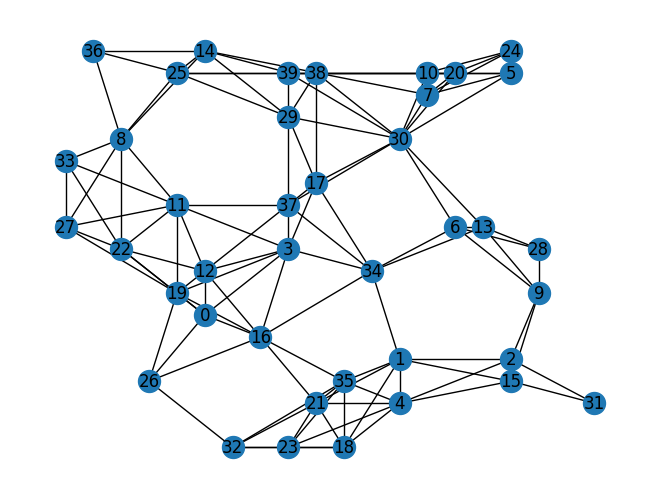

In [4]:
dist = 5
Clear_Edge(G)
Add_Edge(G, dist)
Show_Graph(G, pos)
# Save_Adjacency(G)

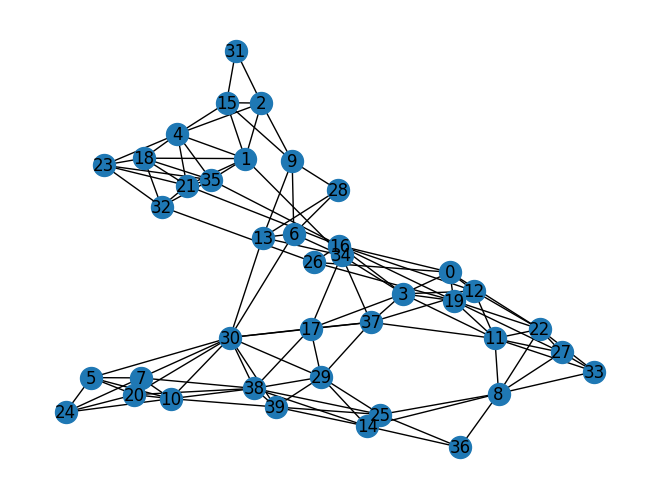

In [10]:
# Generate the new graph base on the adjacency matrix
adj = Get_Adjacency()
New_G = nx.from_numpy_array(np.array(adj))
Show_Graph(New_G, None)